In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
dataset = pd.read_csv('breast-cancer.csv')
print(dataset.columns)

Index(['id', ' diagnosis', ' radius_mean', ' texture_mean', ' perimeter_mean',
       'area_mean', ' smoothness_mean', ' compactness_mean', ' concavity_mean',
       ' concave points_mean', ' symmetry_mean', ' fractal_dimension_mean',
       'radius_se', ' texture_se', ' perimeter_se', ' area_se',
       ' smoothness_se', 'compactness_se', ' concavity_se',
       ' concave points_se', ' symmetry_se', 'fractal_dimension_se',
       ' radius_worst', ' texture_worst', 'perimeter_worst', ' area_worst',
       ' smoothness_worst', 'compactness_worst', ' concavity_worst',
       ' concave points_worst', 'symmetry_worst', ' fractal_dimension_worst'],
      dtype='object')


In [10]:
dataset.shape

(569, 32)

In [12]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
print(dataset.groupby(' diagnosis').size())

 diagnosis
B    357
M    212
dtype: int64


of these 569 data points , 212 labeled as malignant, and 357 as benign.


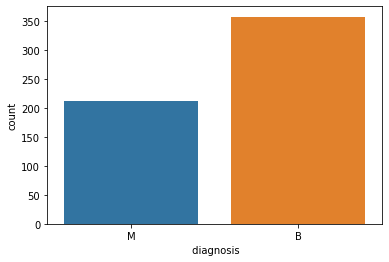

In [17]:
import seaborn as sns
sns.countplot(dataset[' diagnosis'], label='Count')

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        569 non-null    int64  
 1    diagnosis                569 non-null    object 
 2    radius_mean              569 non-null    float64
 3    texture_mean             569 non-null    float64
 4    perimeter_mean           569 non-null    float64
 5   area_mean                 569 non-null    float64
 6    smoothness_mean          569 non-null    float64
 7    compactness_mean         569 non-null    float64
 8    concavity_mean           569 non-null    float64
 9    concave points_mean      569 non-null    float64
 10   symmetry_mean            569 non-null    float64
 11   fractal_dimension_mean   569 non-null    float64
 12  radius_se                 569 non-null    float64
 13   texture_se               569 non-null    float64
 14   perimeter

Since ID doesn't contribute as such in the model, we can drop it from the dataset. 

In [21]:
dataset.drop('id' , axis=1, inplace=True)

# k-Nearest Neighbors 

The k-NN algorithm is arguably the simplest machine learning alogorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset- its "Nearest Neighbors".

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(dataset.loc[:,dataset.columns !=' diagnosis'], dataset[' diagnosis'], 
                                                stratify=dataset[' diagnosis'], 
                                                random_state= 66
                                               )

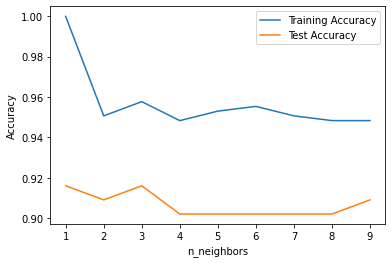

In [31]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]


# try n_neighbors from 1 to 10.
neighbors_settings = range(1,10)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors= n_neighbors)
    knn.fit(X_train,y_train)
    
    # record training set accuracy
    training_accuracy.append(knn.score(X_train,y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='Training Accuracy' ) 
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('knn_compare_model')



The plot shows the training and test set accuracy on the Y-axis against the setting of n_neighbors on the X-axis.
Considering a single nearest neighbors, the prediction on the training set is perfect. 

But when more neighbors are considered , the training accuracy drops, indicating that using the single nearest neighbor 
leads to a model that is too complex.

The best performace is somewhere around 3 nieghbors. Still, it is a good to keep the scale of the plot in mind.
The worst performance is more than 90% accurancy, which might still be a pretty good.

The above plot suggests that we should choos n_neighbors =3 .


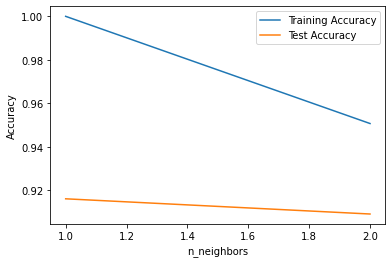

In [35]:
training_accuracy_1=[]
test_accuracy_1=[]
neighbors_settings = range(1,3)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors= n_neighbors)
    knn.fit(X_train,y_train)
    
    # record training set accuracy
    training_accuracy_1.append(knn.score(X_train,y_train))
    # record test set accuracy
    test_accuracy_1.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='Training Accuracy' ) 
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('knn_compare_model')


In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.92


# Logistic Regression 

One of the most common Linear classification algorithms is Logistic Regression. 

In [38]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression().fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Testing set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.951
Testing set score: 0.937


/usr/local/Cellar/jupyterlab/2.0.1/libexec/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The default value of C=1 provides quite good performance with 96% accuracy on training and 94%accuracy on test set. 
Lets try to increase C to fit a more flexible model to see whether we can improve the performance.


In [39]:
logreg100= LogisticRegression(C=100).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Testing set score: {:.3f}".format(logreg100.score(X_test,y_test)))

Training set score: 0.946
Testing set score: 0.958


/usr/local/Cellar/jupyterlab/2.0.1/libexec/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Using C=100 results in lower accuracy on both training set and higher acucracy test set, 
proved underfitting, confirming that less regularization and more complex model should perform better.


In [42]:
logreg001= LogisticRegression(C=0.01).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train,y_train)))
print("Testing set score: {:.3f}".format(logreg001.score(X_test,y_test)))

Training set score: 0.948
Testing set score: 0.895


/usr/local/Cellar/jupyterlab/2.0.1/libexec/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Using C =0.01 results in lower accuracy on the training set and much lower accuracy on the test set. 
It indicates our model doesn't generalize well from our training data to unseen data with C =0.01.
Overfitting occures.

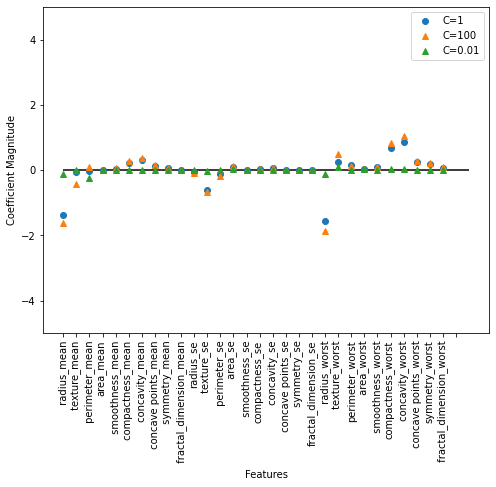

In [48]:
dataset_features = [x for i ,x in enumerate(dataset.columns) if i !=0]

plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, '^', label="C=0.01")
plt.xticks(range(dataset.shape[1]), dataset_features, rotation=90)
plt.hlines(0,0,dataset.shape[1])
plt.ylim(-5,5)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.legend()
plt.savefig('log_coef')

 

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set : {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set : {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set : 1.000
Accuracy on test set : 0.937


In [51]:
tree= DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set : {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set : {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set : 0.986
Accuracy on test set : 0.937


# Feature Imortance in Trees

Feature importance rates how important each feature is for the decision a tree makes. 
It is a number between 0 to 1 for each feature where 
0 means "Not used at all", and 
1 means "Perfectly predicts the target."
The feature importance always sum to 1.


In [53]:
print("Feature Importance : \n{}".format(tree.feature_importances_))

Feature Importance : 
[0.         0.02665433 0.         0.02299068 0.         0.
 0.         0.01581361 0.         0.         0.         0.
 0.01644953 0.         0.         0.         0.         0.
 0.         0.         0.         0.03377907 0.76882622 0.
 0.00852939 0.01013634 0.         0.09682083 0.         0.        ]


Lets visualize the feature importances.


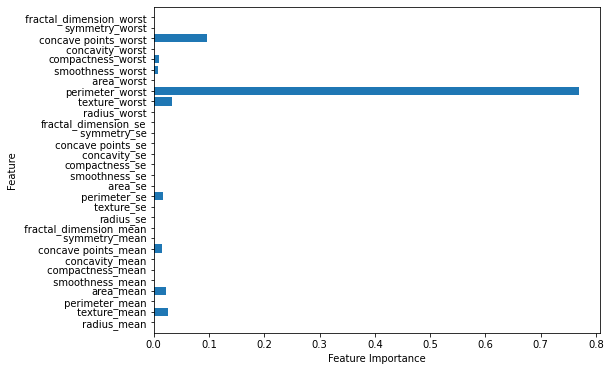

In [55]:
def plot_feature_importance_cancer(model):
    plt.figure(figsize=(8,6))
    n_features =30
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dataset_features)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    

plot_feature_importance_cancer(tree)
plt.savefig('feature_imporance')


Feature 'perimeter_worst' is by far the most important feature. 
This confirms our observation in analyzin the tree that the first level already sepeates the two classes failrly well.


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

rforest= RandomForestClassifier()
rforest= rforest.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(rforest.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(rforest.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.951


The random forest gives us an accuracy of 95.1%, better than a single decision tree, without tuning any parameters.

# Feature importance in Random Forest.

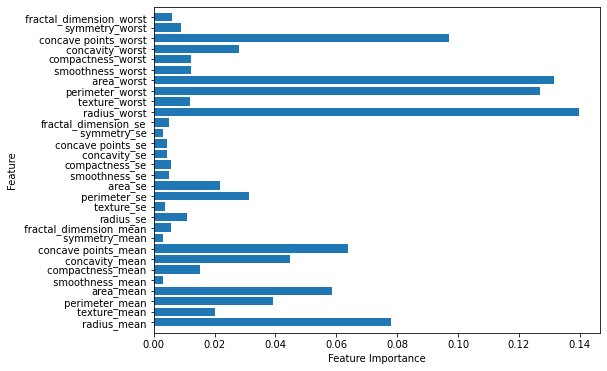

In [59]:
plot_feature_importance_cancer(rforest)

Like single decision tree, the random forest also gives importance to 'perimeter_worst', but also chooses 'radius_worst'
to be the most important feature overall. 
The randomness in building the random forest forces the algorithm to consider many possible explanations, the result 
being that the random forest captures a much broader picture of the data than a single tree. 


# Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier(random_state=0)
gb.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.944


As the training set accuracy is 100% , we are likely to be overfitting. 
To reduce the overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lowering the learning rate.




In [63]:
gb1= GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb1.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test,y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.937


In [64]:
gb2= GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb2.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test,y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.930


Both methods of decreasing the model complexity reduced the traning set accuracy , as expected. 
In this cases, none of these methods incresed the generalization performance of the test set. 


Still, we can visualize the feature importance to get more insight into our model even though 
we are not happy with the model outcomes.


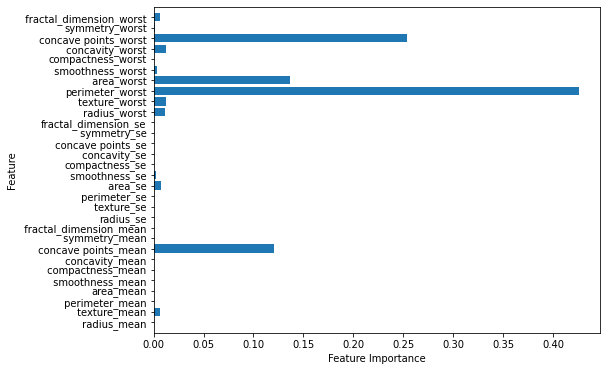

In [69]:

plot_feature_importance_cancer(gb1)

# Support Vector Machine

In [71]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train,y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test,y_test)))

Accuracy on training set: 0.92
Accuracy on test set: 0.90


The model overfits with a perfect score on the training set with 90% test accuracy.

SVM requires all the features to vary on a similar scale. We will need to rescale our data that all the features are 
approximately on the same scale.


In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

svc= SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))


Accuracy on training set: 0.981
Accuracy on test set: 0.986


Scaling the data made a huge difference . Now we are acutally in an underfitting regime,where training and 
test set performance are quite similar but less close to 100% accuracy. From here , we can try increasing 
either C or gamma to fit a more complex model.

In [81]:
svc =SVC(C=100)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


Here , increasing C allows us to improve the model significance , resulting 96% accurate on test set. 

# Neural Networks

In [83]:
from sklearn.neural_network import MLPClassifier


mlp= MLPClassifier(random_state=0)
mlp.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.397
Accuracy on test set: 0.399


Accuracies are very low due to scaling issue. Neural netwroks also expect all input features to vary in a simialr way,
and ideally to have a mean on 0 , and a varaince of 1 . We must rescale our data so that it fulfills there requirements.


In [85]:
scaler = MinMaxScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled =scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)


print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.958


/usr/local/Cellar/jupyterlab/2.0.1/libexec/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)





Results are much better after scaling, and quite competitive.

In [87]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.939
Accuracy on test set: 0.902


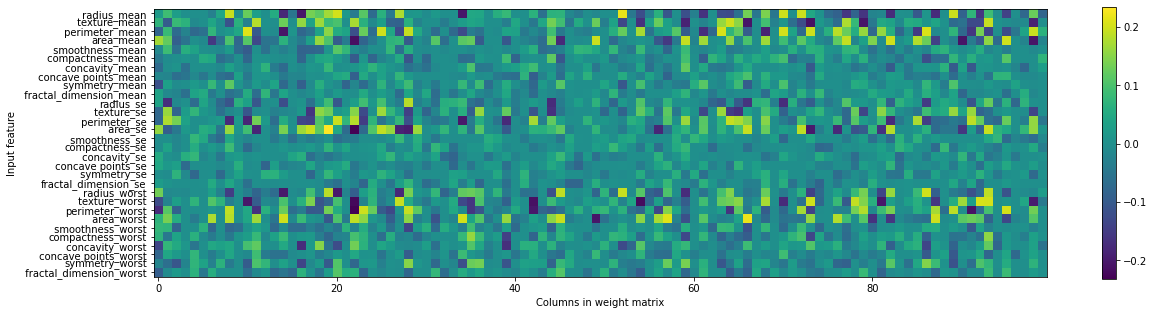

In [89]:

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), dataset_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

The above plot shows the weights that were learned connecting the input to the first hidden layer. The rows in this plot correspond to the 30 input features, while the columns correspond to the 100 hidden units. Light colors represent large positive values, while dark colors represent negative values.

One possible inference we can make is that features that have very small weights for all of the hidden units are “less important” to the model. We can see that “mean smoothness” and “mean compactness,” in addition to the features found between “smoothness error” and “fractal dimension error,” have relatively low weights compared to other features. This could mean that these are less important features or possibly that we didn’t represent them in a way that the neural network could use.